## Importing libraries

In [145]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing 


In [146]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [147]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [148]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [149]:
for x,y in training_set:
    print (x, x.shape)
    print (y, y.shape)
    break

tf.Tensor(
[[[[147.75 136.75 132.75]
   [140.25 129.25 125.25]
   [140.5  129.5  125.5 ]
   ...
   [180.   172.   170.  ]
   [183.75 175.75 173.75]
   [176.   168.   166.  ]]

  [[156.25 145.25 141.25]
   [140.5  129.5  125.5 ]
   [143.5  132.5  128.5 ]
   ...
   [184.75 176.75 174.75]
   [171.25 163.25 161.25]
   [168.75 160.75 158.75]]

  [[139.   128.   124.  ]
   [143.5  132.5  128.5 ]
   [147.5  136.5  132.5 ]
   ...
   [184.25 176.25 174.25]
   [175.5  167.5  165.5 ]
   [163.75 155.75 153.75]]

  ...

  [[154.   143.   139.  ]
   [141.25 130.25 126.25]
   [129.25 118.25 114.25]
   ...
   [143.25 133.25 131.25]
   [144.   134.   132.  ]
   [146.25 136.25 134.25]]

  [[129.25 118.25 114.25]
   [142.25 131.25 127.25]
   [131.25 120.25 116.25]
   ...
   [160.5  150.5  148.5 ]
   [145.   135.   133.  ]
   [142.   132.   130.  ]]

  [[137.25 126.25 122.25]
   [148.25 137.25 133.25]
   [141.75 130.75 126.75]
   ...
   [157.5  147.5  145.5 ]
   [142.5  132.5  130.5 ]
   [153.25 143.25 14

### To avoid Overshooting

1. Choose small learning rate default is 0.001, we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neurons
3. Add more Convolution layer to extract more features from images (there may be possibility that model to capture relevant feature or model is confusing due to lack of feature so feed with more features)
4. We add Dropout to avoid problem of Overfitting (more the model gets complpex more the chances of overfitting increases) (we need be in-between Underfitting & Overfitting)

## Building Model

In [150]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [151]:
model = Sequential()

## Building Convolution Layer

In [152]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [153]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [154]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [155]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [156]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [157]:
model.add(Dropout(0.25))

In [158]:
model.add(Flatten())

In [159]:
model.add(Dense(units=1500,activation='relu'))

In [160]:
model.add(Dropout(0.4))

In [161]:
# Output Layer
model.add(Dense(units=38,activation='softmax'))

## Compiling Model

In [162]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',metrics=['accuracy'])

In [163]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_36 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_38 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                 

## Model Training

In [165]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 188s 85ms/step - loss: 0.8131 - accuracy: 0.7481 - val_loss: 0.4580 - val_accuracy: 0.8540
Epoch 2/10
2197/2197 [==============================] - 153s 70ms/step - loss: 0.3587 - accuracy: 0.8851 - val_loss: 0.2462 - val_accuracy: 0.9210
Epoch 3/10
2197/2197 [==============================] - 152s 69ms/step - loss: 0.2256 - accuracy: 0.9270 - val_loss: 0.2082 - val_accuracy: 0.9304
Epoch 4/10
2197/2197 [==============================] - 137s 62ms/step - loss: 0.1567 - accuracy: 0.9479 - val_loss: 0.1678 - val_accuracy: 0.9468
Epoch 5/10
2197/2197 [==============================] - 137s 62ms/step - loss: 0.1217 - accuracy: 0.9595 - val_loss: 0.2035 - val_accuracy: 0.9393
Epoch 6/10
2197/2197 [==============================] - 137s 62ms/step - loss: 0.0938 - accuracy: 0.9689 - val_loss: 0.1347 - val_accuracy: 0.9566
Epoch 7/10
2197/2197 [==============================] - 137s 62ms/step - loss: 0.0779 - accuracy: 0.9748 - val_loss: 0

## Model Evaluation

In [101]:
# Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 47s 21ms/step - loss: 0.0147 - accuracy: 0.9960


In [102]:
print(train_loss,train_acc)

0.014722836203873158 0.9959741234779358


In [103]:
# Model Evaluation on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 12s 21ms/step - loss: 0.0903 - accuracy: 0.9716


In [104]:
print(val_loss,val_acc)

0.09031469374895096 0.9716025590896606


## Saving Model

In [107]:
model.save("trained_model.keras")

In [108]:
training_history.history

{'loss': [1.4117188453674316,
  0.4735713601112366,
  0.2748962938785553,
  0.1858513206243515,
  0.13865910470485687,
  0.10815859586000443,
  0.08655546605587006,
  0.0754348486661911,
  0.06416855752468109,
  0.05880998447537422],
 'accuracy': [0.5814496278762817,
  0.8489792943000793,
  0.9109609723091125,
  0.9396116137504578,
  0.9542357325553894,
  0.964762806892395,
  0.971278190612793,
  0.9754747748374939,
  0.978988528251648,
  0.9810655117034912],
 'val_loss': [0.5705198645591736,
  0.3052647113800049,
  0.23048706352710724,
  0.17868632078170776,
  0.17485959827899933,
  0.15605886280536652,
  0.19739890098571777,
  0.1781330406665802,
  0.14933711290359497,
  0.09031464159488678],
 'val_accuracy': [0.8169246315956116,
  0.9012064933776855,
  0.9246528744697571,
  0.9407011270523071,
  0.9415547251701355,
  0.954245388507843,
  0.9411563873291016,
  0.9486114382743835,
  0.9580013751983643,
  0.9716025590896606]}

In [109]:
# Recording model History in json
import json
with open("training_history.json","w") as f:
    json.dump(training_history.history,f)

## Accuracy Visualization

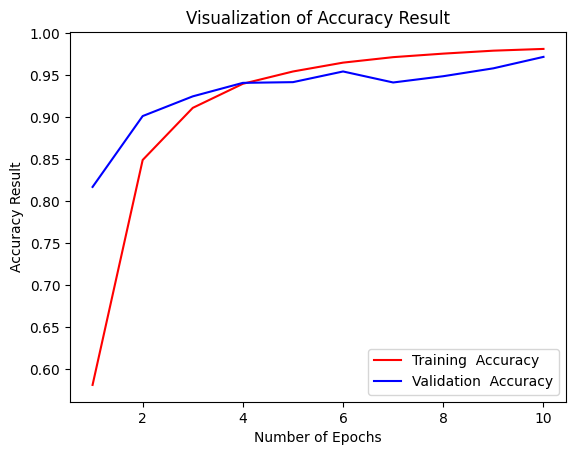

In [120]:
epochs = [i for i in range (1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training  Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation  Accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Other metrics for Model Evaluation

In [121]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [122]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [124]:
y_prediction = model.predict(test_set)
y_prediction,y_prediction.shape

550/550 [==============================] - 10s 18ms/step


(array([[9.99997616e-01, 1.02208894e-07, 4.58001359e-10, ...,
         2.12908635e-15, 9.04223392e-14, 4.03682943e-15],
        [9.99999762e-01, 1.01395861e-08, 9.38536360e-10, ...,
         1.50773569e-17, 8.63271755e-15, 2.94410971e-16],
        [1.00000000e+00, 1.28973925e-08, 8.40963466e-10, ...,
         4.76913219e-15, 4.18443112e-13, 4.79944826e-14],
        ...,
        [2.98263974e-12, 1.71331336e-14, 6.81708734e-09, ...,
         3.01565925e-11, 1.78954182e-12, 9.99999404e-01],
        [4.15627472e-12, 6.99293867e-14, 6.25228758e-10, ...,
         4.29344893e-11, 1.64882500e-11, 9.99999881e-01],
        [2.64199600e-11, 1.34496199e-11, 2.06641822e-11, ...,
         1.38967261e-13, 1.07426047e-11, 9.99999881e-01]], dtype=float32),
 (17572, 38))

In [127]:
predicted_categories = tf.argmax(y_prediction,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [128]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [129]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

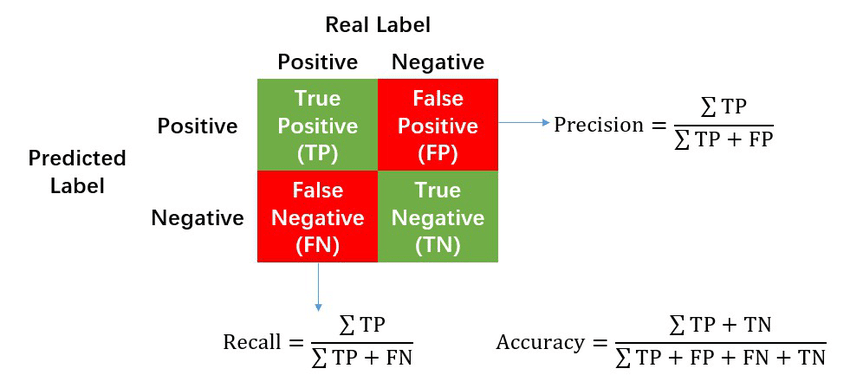

In [133]:
from sklearn.metrics import classification_report,confusion_matrix

In [132]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.97      0.95       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.95      0.99      0.97       440
                                   Apple___healthy       0.97      0.97      0.97       502
                               Blueberry___healthy       0.96      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.89      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.97      0.

In [135]:
cm = confusion_matrix(y_true,predicted_categories)
cm

array([[488,   6,   1, ...,   0,   1,   0],
       [  1, 494,   1, ...,   0,   0,   0],
       [  0,   0, 436, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 489,   0,   0],
       [  0,   0,   0, ...,   0, 447,   0],
       [  0,   0,   1, ...,   0,   0, 475]], dtype=int64)

### Confusion Matrix Visualization

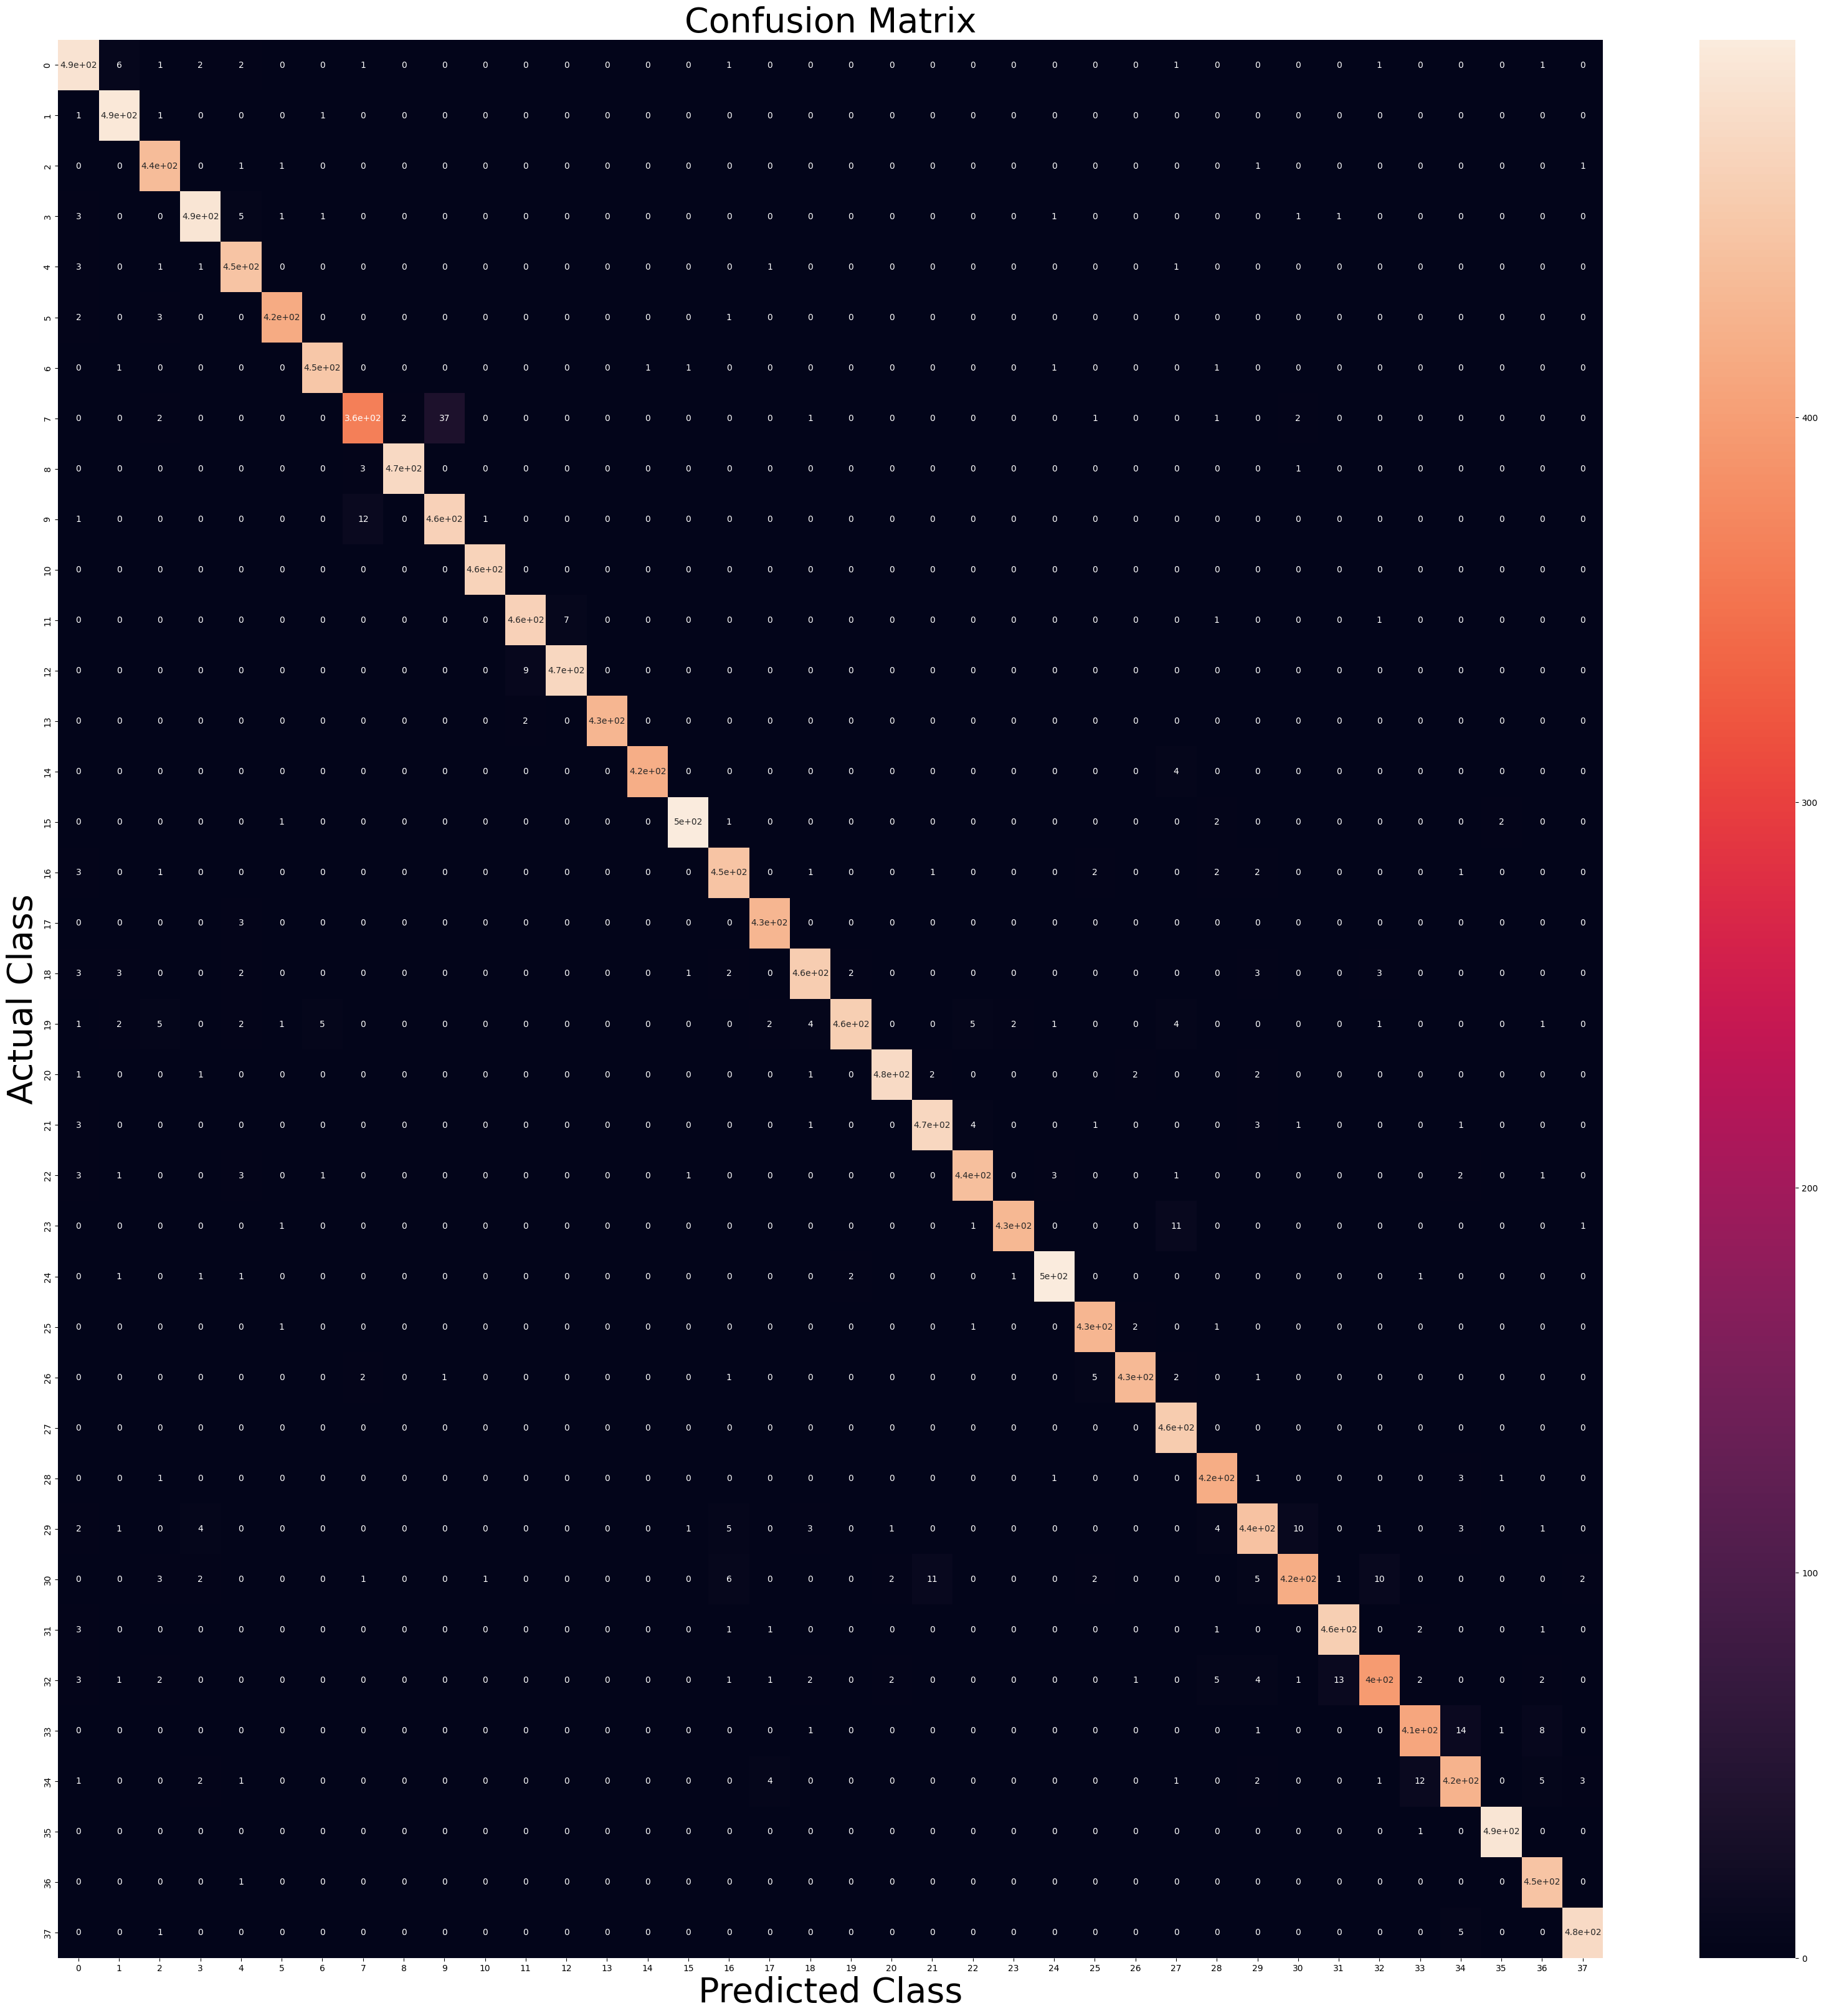

In [166]:
plt.figure(figsize=[40,40])
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=40)
plt.ylabel("Actual Class",fontsize=40)
plt.title("Confusion Matrix",fontsize=40)
plt.show()

In [167]:
test_loss,test_acc = model.evaluate(test_set)

550/550 [==============================] - 13s 23ms/step - loss: 0.0881 - accuracy: 0.9746


In [169]:
print(test_loss,test_acc)

0.08813372999429703 0.9745618104934692
